      price      brand    model  year   mileage
1      6300     toyota  cruiser  2008  274117.0
2      2899       ford       se  2011  190552.0
3      5350      dodge      mpv  2018   39590.0
4     25000       ford     door  2014   64146.0
5     27700  chevrolet     1500  2018    6654.0
...     ...        ...      ...   ...       ...
2495   7800     nissan    versa  2019   23609.0
2496   9200     nissan    versa  2018   34553.0
2497   9200     nissan    versa  2018   31594.0
2498   9200     nissan    versa  2018   32557.0
2499   9200     nissan    versa  2018   31371.0

[2499 rows x 5 columns]
Least Squares method using np.polyfit()
slope is -0.08134245905198012
intercept is 23021.775150244102 

Least Squares method using calculation formula
slope is -0.08134245905197965
intercept is 23021.77515024407 

Least Squares method using scipy.stats.linregress
slope is -0.08134245905197962
intercept is 23021.77515024407 

In line of best fit, 
slope is -0.08134245905198012
intercept is 23021.7

Text(0, 0.5, 'sum of squares value')

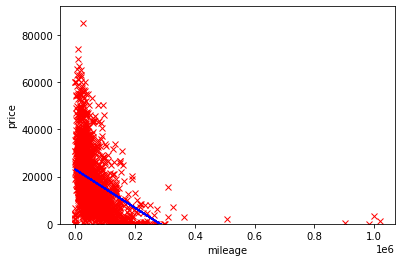

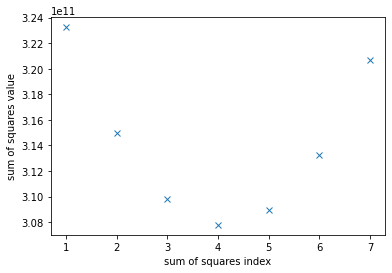

In [61]:

#Least Squares Method

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("USA_cars_datasets.csv")

df = pd.DataFrame(data,index=data.index)
df.index += 1

print(df[["price","brand","model","year","mileage"]])

price = df["price"]
brand = df["brand"]
model = df["model"]
year = df["year"]
mileage = df["mileage"]

x = mileage.values
y = price.values

mean_x = np.mean(x)
mean_y = np.mean(y)

m = 0
c = 0
n = len(x)

plt.figure(1)

plt.plot(x,y,'rx')

m,c = np.polyfit(x,y,1)
plt.plot(x,m*x+c,"b-")

plt.ylim(0,)
plt.xlabel("mileage")
plt.ylabel("price")

print("Least Squares method using np.polyfit()")
print("slope is",m)
print("intercept is",c,"\n")


# slope of best fit line defined as
# m = ()
# least squares line
#calculate_slope = (n*(sum(x*y))-sum(x)*sum(y))/(n*(sum(x^2))-(sum(x))^2)
#calculate_intercept = (sum(y)-calculate_slope * sum(x))/n

def slope_and_intercept():
    sum_of_xy = 0
    sum_of_x = 0
    sum_of_y = 0
    sum_of_x_squared = 0
    amount_of_elements = n
    for i in range(amount_of_elements):
        sum_of_xy += x[i]*y[i]
        sum_of_x += x[i]
        sum_of_y += y[i]
        sum_of_x_squared += np.square(x[i])
    slope_of_line = ((amount_of_elements*(sum_of_xy))-(sum_of_x*sum_of_y))/(amount_of_elements*(sum_of_x_squared)-np.square(sum_of_x))
    intercept_of_line = ((sum_of_y)-slope_of_line*sum_of_x)/amount_of_elements     
    
    return slope_of_line,intercept_of_line
a,b = slope_and_intercept()
#print(a,b)
print("Least Squares method using calculation formula")
print("slope is",a)
print("intercept is",b,"\n")


slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("Least Squares method using scipy.stats.linregress")
print("slope is",slope)
print("intercept is",intercept,"\n")

#Sum of squared residuals
def SSR(m,c):
    # SSR = sum(((c+m*xi)-yi)^2)
    # where (x,y) is xi,yi
    # and c = intercept, m = slope of best fit line
    # and (c+m*xi) is value xi, on best fit line
    # and yi is observed actual value from data at xi
    # hence calculating distance between line and observed value
    sum_of_squared_residuals = 0
    for i in range(n):
        sum_of_squared_residuals += np.square((m*x[i]+c)-y[i])
    return sum_of_squared_residuals

ssr_index = np.arange(1,8)
ssr_values = np.empty(7)

ssr_values[0] = SSR(-0.05,c)
ssr_values[1] = SSR(-0.06,c)
ssr_values[2] = SSR(-0.07,c)
ssr_values[3] = SSR(m,c)
ssr_values[4] = SSR(-0.09, c)
ssr_values[5] = SSR(-0.1,c)
ssr_values[6] = SSR(-0.11,c)

print("In line of best fit, ")
print("slope is",m)
print("intercept is",c)
print("it's sum of squares is ",ssr_values[3],"\n")

plt.figure(2)
plt.plot(ssr_index,ssr_values,"x")
plt.xlabel("sum of squares index")
plt.ylabel("sum of squares value")

In [ ]:
# Gradient Descent

# next position = current position - small step * direction of fastest increase
# two things to know:
# which way to go, how big a step to take
"""
Power Rule
y = x^n
dy/dx = nx^(n-1)
i.e. 3x^5 = 15x^4

Chain Rule
dz/dx = dz/dy * dy/dx
i.e.
if y = x^2 and x = z^2, find dy/dz
dy/dz = dy/dx * dx/dz
    = 2x * 2z
    = 4xz
    
Partial Derivatives
f(x,y) = x^4 + y^7
df/dx = 4x^3 + 0    (all non-x stuff treated as constant)
df/dy = 0 + 7y^6    (all non-y stuff treated as constant)

Cost Function Equation
J(m,b) = 1/N * Sum[i=1 to N] (Error of i)^2

Calculating for just one step = removing the sum
J(m,b) = 1/1 (Error)^2 = (Error)^2
dJ/dm = 2 * Error * d(Error)/dm 
dJ/db = 2 * Error * d(Error)/db

Gradient of error w.r.t to m and b
Error = Y' - Y (where Y' is Predicted and Y is Actual)
d(Error)/dm = d(Y' - Y)/dm
            = d (mx + b - Y)/dm
            = x
d(Error)/db = d(Y' - Y)/db
            = d (mx + b - Y)/db
            = 1
(Derivative of something is it's gradient)

Plugging values into Cost Function
and multiplying it by Learning Rate (how large a step to make)

dJ/dm = 2 * Error * d(Error)/dm * Learning Rate
        = 2 * Error * x * Learning Rate     
        (2 * Error * x) section determines the direction to minimize error
        
dJ/db = 2 * Error * d(Error)/dm * Learning Rate
        = 2 * Error * 1 * Learning Rate
        = 2 * Error * Learning Rate 

the 2 here isn't significant so can remove it, so, 
dJ/dm = Error * x * Learning Rate
dJ/db = Error * Learning Rate

In the equation y = mx + b, m and b are it's parameters
During the training process, there will be small changes in it's values
Small change denoted by δ
Value of parameters will be updated as 
m = m - δm
b = b - δb
Aim here is find values of m and b in y = mx + b
for which error is minimum, 
i.e. values that minimize cost function

dJ/dm = Error * x * Learning Rate
Since m = m - δm
m1 = m0 - Error * x * Learning Rate

dJ/db = Error * Learning Rate
Since b = b - δb
b1 = b0 - Error * Learning Rate

m1 , b1 = next position parameters
m0 , b0 = current position parameters

Hence, to solve for gradient, 
iterate through data points using new m and b values
and compute partial derivatives.
This new gradient tells us the slope of our cost function 
at our current position and direction should move
to update our parameters. 
The size of our update is controlled by Learning Rate.

Gradient descent uses direction with highest value of negative slope
i.e. for y = x^2 where x = [-1,1]
minimum is at x = 0
wanna make x move to right if x<0
wanna make x move to left if x>0

How to do that?
Noticed gradient of the function
gradient > 0 when x > 0
gradient < 0 when x < 0
which is opposite of moving direction of x.

Gradient descent makes use of this 
and let x move to opposite direction of it's gradient

"""

c:\users\cliff\pycharmprojects\neuralnetsreadhandwriting\venv\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
c:\users\cliff\pycharmprojects\neuralnetsreadhandwriting\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
c:\users\cliff\pycharmprojects\neuralnetsreadhandwriting\venv\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
c:\users\cliff\pycharmprojects\neuralnetsreadhandwriting\venv\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.


'\nfig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(20,10))\nax1.plot()\n\nax1.plot(objective_history,"b--",label = "Objective history")\nax1.plot(best_objective_history,"r-",label = "Best objective history")\nax1.set_xlabel("Iterations")\nax1.set_ylabel("Objective Values")\nax1.legend(loc=\'lower right\')\nax1.set_title("Combined Objective Function")\n\nax2.plot(category_history,"g-", label = f\'Category One Percentage History. \'\n                                        f\'Desired Percentage is {category_one_desired_percentage}.\')\nax2.set_xlabel("Iterations")\nax2.set_ylabel("Category One Percentage")\nax2.legend(loc = "lower right")\nax2.set_title("Category Objective Function")\n\nax3.plot(value_history,"m-", label = "Values History")\nax3.set_xlabel("Iterations")\nax3.set_ylabel("Value")\nax3.legend(loc = "lower right")\nax3.set_title("Value Objective Function")\n\nfig.tight_layout()\n\n\n'

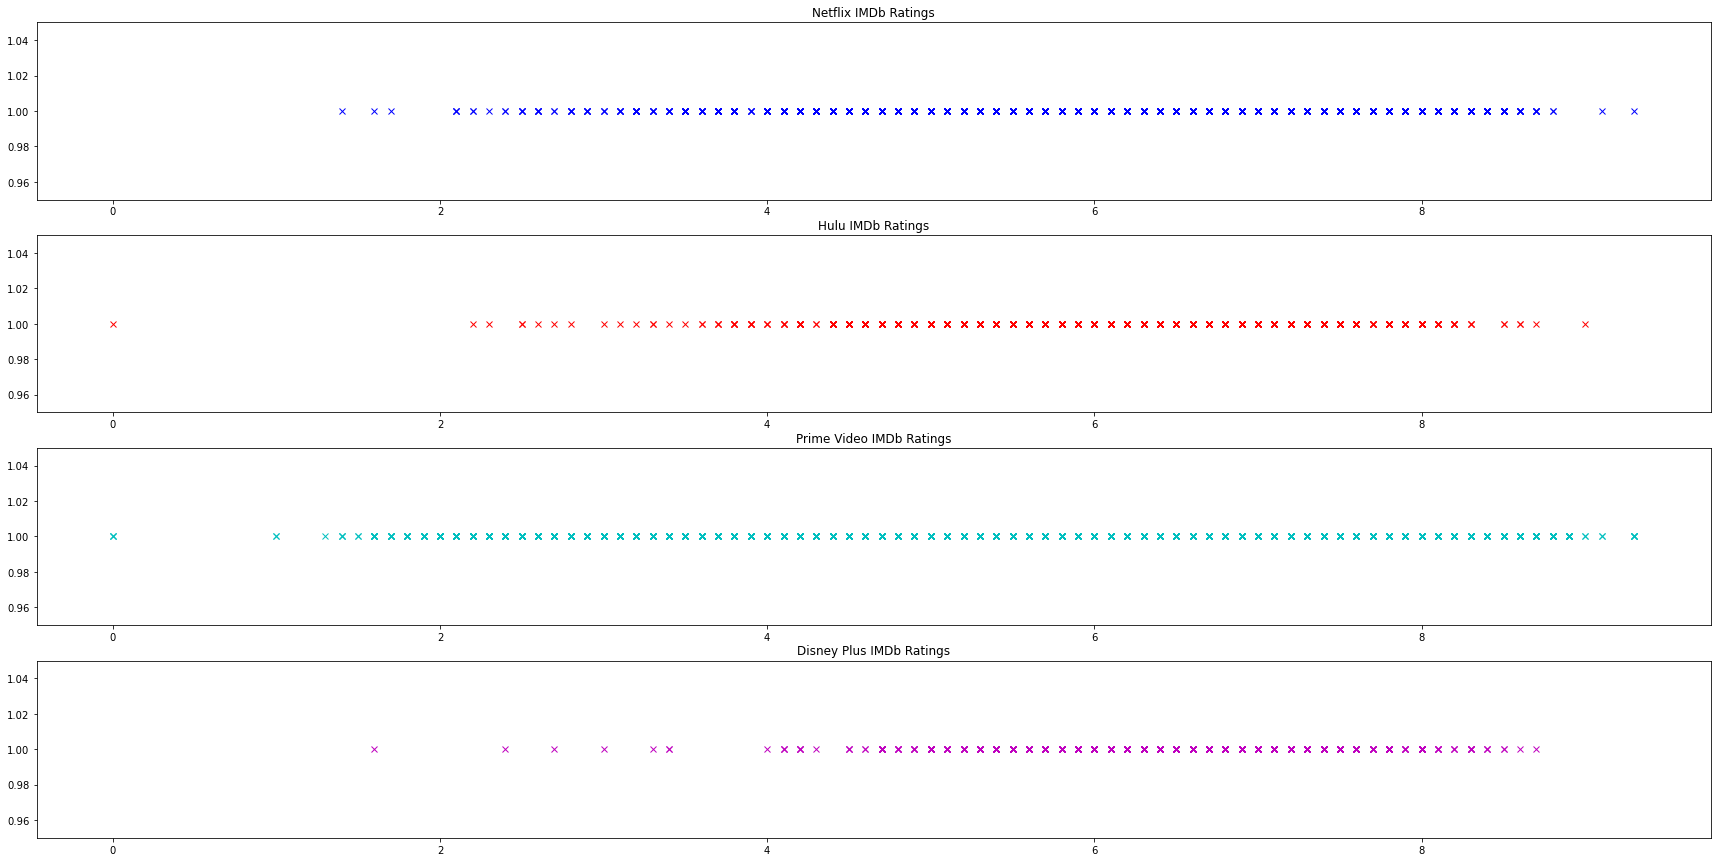

In [60]:

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats


data = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")

df = pd.DataFrame(data,index=data.index,columns=data.columns)



#print(df.head())
#print(df.dtypes)
#print(df.index)
#print(df.columns)
#print(df.values)
#print(df.describe())
#df.sort_values('Rotten Tomatoes',ascending=False)
df[['ID','Title','IMDb','Rotten Tomatoes','Netflix','Hulu','Prime Video','Disney+']]

id = df["ID"]
title = df["Title"]
imdb = df["IMDb"]
rotten_tomatoes = df["Rotten Tomatoes"]
netflix = df["Netflix"]
hulu = df["Hulu"]
prime_video = df["Prime Video"]
disney_plus = df["Disney+"]

y = imdb.values
a = netflix.values
b = hulu.values
c = prime_video.values
d = disney_plus.values

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, figsize=(30,15))
ax1.plot(y,a,'bx')
#ax1.set_xlabel("Netflix")
#ax1.set_ylabel("IMDb Rating")
ax1.set_ylim([1,1])
ax1.set_title("Netflix IMDb Ratings")

ax2.plot(y,b,'rx')
#ax2.set_xlabel("Hulu")
#ax2.set_ylabel("IMDb Rating")
ax2.set_ylim([1,1])
ax2.set_title("Hulu IMDb Ratings")

ax3.plot(y,c,'cx')
#ax3.set_xlabel("Prime Video")
#ax3.set_ylabel("IMDb Rating")
ax3.set_ylim([1,1])
ax3.set_title("Prime Video IMDb Ratings")

ax4.plot(y,d,'mx')
ax4.set_ylim([1,1])
#ax4.set_xlabel("Disney")
#ax4.set_ylabel("IMDb Rating")
ax4.set_title("Disney Plus IMDb Ratings")


"""
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(20,10))
ax1.plot()

ax1.plot(objective_history,"b--",label = "Objective history")
ax1.plot(best_objective_history,"r-",label = "Best objective history")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Objective Values")
ax1.legend(loc='lower right')
ax1.set_title("Combined Objective Function")

ax2.plot(category_history,"g-", label = f'Category One Percentage History. '
                                        f'Desired Percentage is {category_one_desired_percentage}.')
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Category One Percentage")
ax2.legend(loc = "lower right")
ax2.set_title("Category Objective Function")

ax3.plot(value_history,"m-", label = "Values History")
ax3.set_xlabel("Iterations")
ax3.set_ylabel("Value")
ax3.legend(loc = "lower right")
ax3.set_title("Value Objective Function")

fig.tight_layout()


"""

